In [1]:
# Import dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Read crime CSV file

crime_df = pd.read_csv("LA_Crime_by_District_2018.csv", encoding="UTF-8", low_memory = False)  

# Display data

crime_df.head()

,crm_cd_desc,date_occ,premis_desc,time_occ,district
0,"THEFT, PERSON",2018-07-30T00:00:00.000,SIDEWALK,1840,west hollywood
1,BIKE - STOLEN,2018-11-15T00:00:00.000,STREET,719,santa monica
2,VEHICLE - STOLEN,2018-06-22T00:00:00.000,STREET,930,west hollywood
3,VEHICLE - STOLEN,2018-12-18T00:00:00.000,STREET,1900,los angeles
4,VEHICLE - STOLEN,2018-03-18T00:00:00.000,STREET,2100,san fernando


In [2]:
# Create bins for the time frames

bins = [0.0, 359.0, 759.0, 1159.0, 1559.0, 1959.0, 2400.0]

# Label the time frames

times = ["12:00am-3:59am", "4:00am-7:59am", "8:00am-11:59pm", "12:00pm-3:59pm", "4:00pm-7:59pm", "8:00pm-11:59pm"]

In [3]:
# Bin the Crime Data into time frames

crime_df["Time Frame"] = pd.cut(crime_df["time_occ"], bins, labels=times)

# Get rid of "takoradi" data because the lat and long for that data is 0.0

crime_df = crime_df[crime_df["district"] != "takoradi"]

# Display data

crime_df.head()

,crm_cd_desc,date_occ,premis_desc,time_occ,district,Time Frame
0,"THEFT, PERSON",2018-07-30T00:00:00.000,SIDEWALK,1840,west hollywood,4:00pm-7:59pm
1,BIKE - STOLEN,2018-11-15T00:00:00.000,STREET,719,santa monica,4:00am-7:59am
2,VEHICLE - STOLEN,2018-06-22T00:00:00.000,STREET,930,west hollywood,8:00am-11:59pm
3,VEHICLE - STOLEN,2018-12-18T00:00:00.000,STREET,1900,los angeles,4:00pm-7:59pm
4,VEHICLE - STOLEN,2018-03-18T00:00:00.000,STREET,2100,san fernando,8:00pm-11:59pm


In [4]:
# Use groupby() and count() to get the number of crimes by district and time frame

num_crimes = pd.DataFrame(crime_df.groupby(["district", "Time Frame"]).count()["crm_cd_desc"])

# Reset index

num_crimes = num_crimes.reset_index()

# Pivot table

pivot_crimes = num_crimes.pivot(index="district",columns="Time Frame", values="crm_cd_desc")

# Fill NaN values as zero

crime_data = pivot_crimes.fillna(value=0)

# Display data

crime_data

Time Frame,12:00am-3:59am,4:00am-7:59am,8:00am-11:59pm,12:00pm-3:59pm,4:00pm-7:59pm,8:00pm-11:59pm
district,,,,,,
alhambra,0.0,3.0,2.0,4.0,2.0,3.0
beverly hills,1029.0,644.0,1584.0,2142.0,2262.0,1707.0
burbank,983.0,714.0,1532.0,2067.0,2086.0,1827.0
calabasas,1932.0,1293.0,3228.0,4749.0,4644.0,3734.0
carson,47.0,27.0,80.0,114.0,127.0,99.0
culver city,1123.0,779.0,1956.0,2511.0,2608.0,2208.0
east los angeles,243.0,183.0,363.0,456.0,608.0,571.0
el segundo,242.0,231.0,464.0,572.0,534.0,484.0
gardena,99.0,74.0,145.0,192.0,161.0,127.0


Text(0.5, 1, 'Crime Count by District and Time')

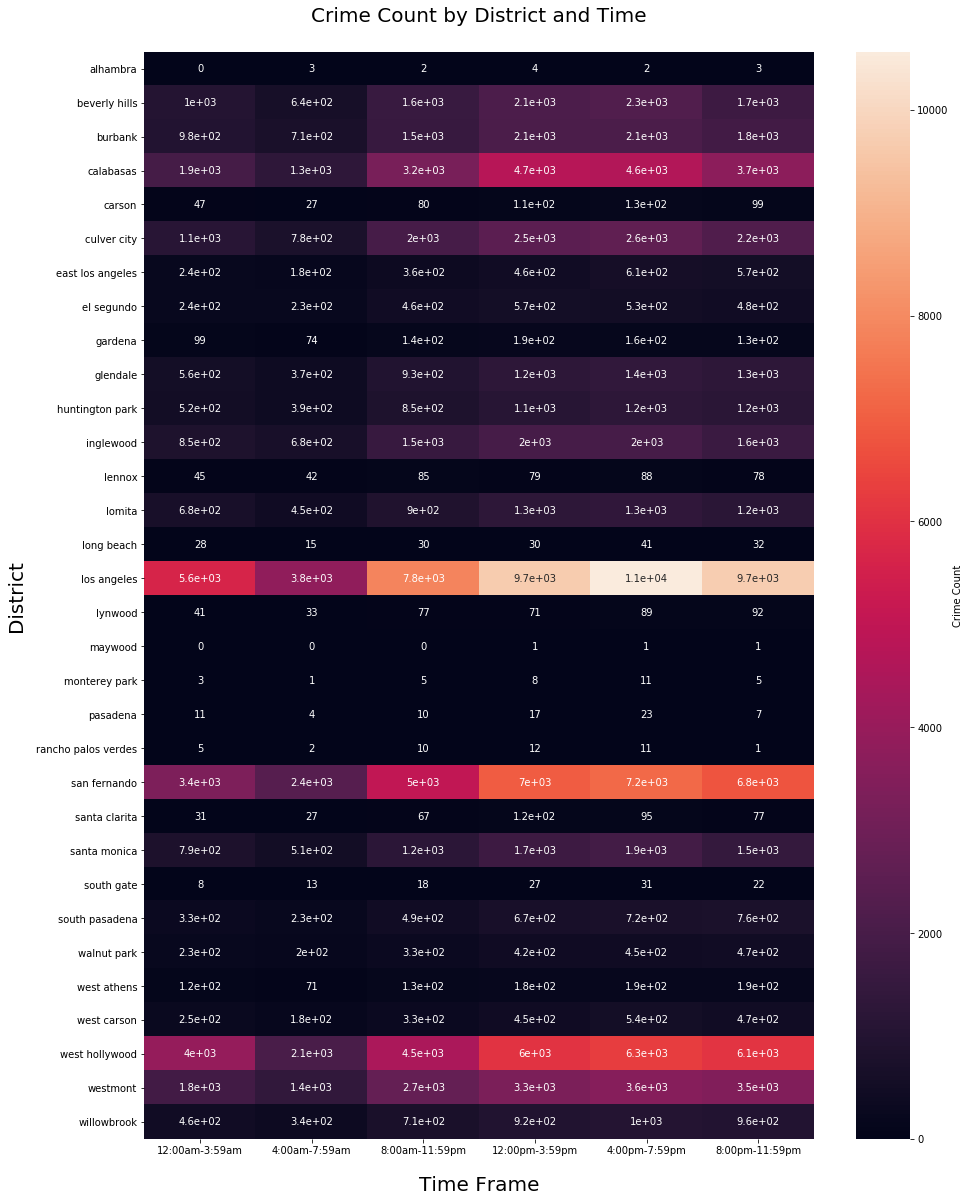

In [5]:
# Create heatmap of data

fig = plt.figure(figsize=(15,20))
sb.heatmap(crime_data, annot=True, cbar_kws={"label":"Crime Count"})

# Label axes and title

plt.xlabel('Time Frame', fontsize=20, labelpad=20)
plt.ylabel('District', fontsize=20, labelpad=10)
plt.title("Crime Count by District and Time", fontsize=20, pad = 30)


In [6]:
# Save heatmap

fig.savefig('Crime_Count_by_District_and_Time.png')

# Close plot

plt.close()